### Project Investment Portfolio ###
#### Mean Variance Model ####



In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as pl
from matplotlib import style

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

import random
import pandas_datareader.data as rd
pl.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
# PART 1
# Get prices and estimate returns
# input required: stock tickers, dates(start and end)
stock_list = ['jpm', 'msft', 'ko','wal','cvx']
start_date = dt.datetime(2012,1,1)
end_date = dt.datetime(2017,1,1)
NUMBER_STOCKS = len(stock_list)



# This reads data from yahoo
df = rd.get_data_yahoo(stock_list, start_date, end_date)['Adj Close']

# prices and returns are defined as matrices 
stock_prices = pd.DataFrame(df)
stock_prices.describe()

stock_returns = stock_prices/stock_prices.shift(1)-1
stock_returns.describe()

# stock_returns2 = np.log(stock_prices/stock_prices.shift(1))
# stock_returns2.describe()
# stock_returns3 = pd.DataFrame(df).pct_change()
# stock_returns3.describe()


Symbols,jpm,msft,ko,wal,cvx
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,45.281415,36.216628,31.626998,22.498997,77.881555
std,10.093333,10.104782,3.245168,9.912528,8.095227
min,23.536764,21.623137,24.301296,6.236246,52.446339
25%,38.167708,26.174276,29.059538,13.373232,71.940266
50%,46.431780,36.234854,31.715335,22.620654,78.815132
75%,52.213311,42.737223,34.054390,30.703530,83.608753
max,75.009087,59.030434,38.591263,47.912632,96.088043


Symbols,jpm,msft,ko,wal,cvx
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,0.000932,0.000888,0.000294,0.001760,0.000285
std,0.014303,0.014675,0.009116,0.018114,0.012949
min,-0.092783,-0.113995,-0.060291,-0.087069,-0.054209
25%,-0.006345,-0.006569,-0.004494,-0.009373,-0.006785
50%,0.000830,0.000219,0.000239,0.001075,0.000352
75%,0.008445,0.007919,0.005439,0.012934,0.007212
max,0.083286,0.104522,0.056872,0.094193,0.062252


<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Price History')

Text(0.5, 0, 'Dates')

Text(0, 0.5, 'Adj. Prices')

<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Return History')

Text(0.5, 0, 'Dates')

Text(0, 0.5, 'Returns')

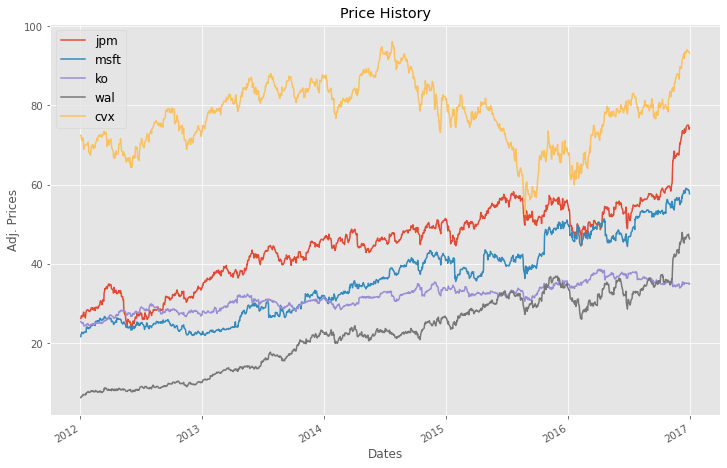

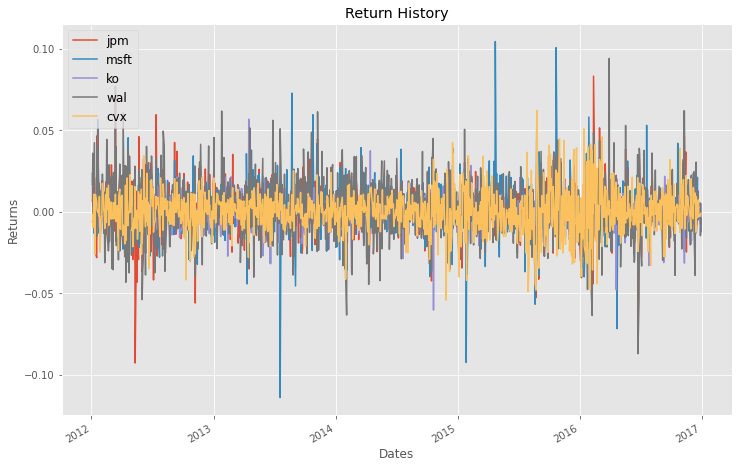

In [4]:
# PART 2
# VISUALIZATION: GRAPHS OF PRICES AND RETURNS

# This creates a plot of prices
stock_prices.plot(figsize=(12,8))
title = 'Price History'
pl.title(title)
pl.xlabel('Dates',fontsize = 12)
pl.ylabel('Adj. Prices',fontsize = 12)
pl.legend(stock_prices.columns.values, loc='upper left',fontsize = 12)

#This creates a plot of returns
stock_returns.plot(figsize=(12,8))
title = 'Return History'
pl.title(title)
pl.xlabel('Dates',fontsize = 12)
pl.ylabel('Returns',fontsize = 12)
pl.legend(stock_returns.columns.values, loc='upper left',fontsize = 12)

In [4]:
# This estimates the expected return of each stock (greek letter mu)  and the variance covariance 
# matrix (greek letter sigma). 

mu = np.round(stock_returns.mean()*252,5)
print(mu)
sigma = np.round(stock_returns.cov()*252,5)
print(sigma)

# correlation chart 


Symbols
jpm     0.23480
msft    0.22379
ko      0.07417
wal     0.44346
cvx     0.07178
dtype: float64
Symbols      jpm     msft       ko      wal      cvx
Symbols                                             
jpm      0.05156  0.02203  0.01141  0.04117  0.02244
msft     0.02203  0.05427  0.01153  0.02252  0.01816
ko       0.01141  0.01153  0.02094  0.01075  0.01143
wal      0.04117  0.02252  0.01075  0.08269  0.02201
cvx      0.02244  0.01816  0.01143  0.02201  0.04225


In [5]:
PART 3
# risk minimization for a minumum return 

from scipy.optimize import minimize

min_return = 0.15

w0 = (0.20,0.20,0.20,0.20,0.20)
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1))

def constraint_SumToOne(w):
    return np.sum(w)-1

def estimate_risk(w):
    w = np.array(w)
    risk = np.sqrt(np.dot(w.T,np.dot(sigma,w)))
    return risk

def constraint_min_return(w):
    w = np.array(w)
    expected_return = np.sum(mu*w)
    return expected_return-min_return


constraints=({'type':'eq','fun':constraint_SumToOne}, {'type':'eq','fun': constraint_min_return})  

opt = minimize(estimate_risk, w0, method='SLSQP', bounds = bounds, constraints = constraints)


w_opt1 = np.round(opt.x,5)
risk_opt1 = estimate_risk(w_opt1)
risk_opt1 = np.round(risk_opt1 ,5)
return_opt1 = np.sum(mu*w_opt1)
return_opt1 = np.round(return_opt1 ,5)
print(w_opt1) 
print(risk_opt1) 
print(return_opt1)  


[0.06537 0.13239 0.59243 0.12382 0.08599]
0.13585
0.15


In [6]:
# Part 4
# return maximization for a maximum risk

max_risk = 0.16

w0 = (0.20,0.20,0.20,0.20,0.20)
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1))

def constraint_SumToOne(w):
    return np.sum(w)-1

def constraint_max_risk(w):
    w = np.array(w)
    risk = np.sqrt(np.dot(w.T,np.dot(sigma,w)))
    return risk - max_risk

def estimate_expected_return(w):
    w = np.array(w)
    expected_return = -1*np.sum(mu*w)
    return expected_return


constraints=({'type':'eq','fun':constraint_SumToOne}, {'type':'eq','fun': constraint_max_risk})  

opt = minimize(estimate_expected_return, w0, method='SLSQP', bounds = bounds, constraints = constraints)


w_opt2 = np.round(opt.x,5)
risk_opt2 = np.sqrt(np.dot(w_opt2.T,np.dot(sigma,w_opt2)))
risk_opt2 = np.round(risk_opt2 ,5)
return_opt2 = estimate_expected_return(w_opt2) 
return_opt2 = -np.round(return_opt2 ,5)
print(w_opt2) 
print(risk_opt2) 
print(return_opt2)  


[0.04293 0.21117 0.408   0.33789 0.     ]
0.16
0.23744


In [15]:
# Part 5
# risk minimization for a vector of minimal retuns: efficient frontier

from scipy.optimize import minimize

risk_opt = []

returns = np.linspace(0.12,0.35,50)
w0 = (0.20,0.20,0.20,0.20,0.20)
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1))

def constraint_SumToOne(w):
    return np.sum(w)-1

def estimate_risk(w):
    w = np.array(w)
    risk = np.sqrt(np.dot(w.T,np.dot(sigma,w)))
    return risk

def constraint_min_return(w):
    w = np.array(w)
    expected_return = np.sum(mu*w)
    return expected_return-target_return


for target_return in returns:
    constraints=({'type':'eq','fun':constraint_SumToOne}, {'type':'eq','fun': constraint_min_return})  
    opt = minimize(estimate_risk, w0, method='SLSQP', bounds = bounds, constraints = constraints)
    risk_opt.append(opt['fun']) 


print(np.round(returns,4))
print(np.round(risk_opt,4))




[0.12   0.1247 0.1294 0.1341 0.1388 0.1435 0.1482 0.1529 0.1576 0.1622
 0.1669 0.1716 0.1763 0.181  0.1857 0.1904 0.1951 0.1998 0.2045 0.2092
 0.2139 0.2186 0.2233 0.228  0.2327 0.2373 0.242  0.2467 0.2514 0.2561
 0.2608 0.2655 0.2702 0.2749 0.2796 0.2843 0.289  0.2937 0.2984 0.3031
 0.3078 0.3124 0.3171 0.3218 0.3265 0.3312 0.3359 0.3406 0.3453 0.35  ]
[0.1332 0.1334 0.1337 0.134  0.1345 0.135  0.1356 0.1363 0.137  0.1378
 0.1387 0.1397 0.1407 0.1418 0.143  0.1442 0.1455 0.1468 0.1483 0.1497
 0.1513 0.1529 0.1546 0.1563 0.1581 0.16   0.1619 0.1638 0.1659 0.1679
 0.1701 0.1722 0.1744 0.1767 0.179  0.1813 0.1837 0.1861 0.1885 0.191
 0.1935 0.1961 0.1987 0.2013 0.2039 0.2066 0.2093 0.212  0.2147 0.2175]


In [23]:
# Part 6
# Monte Carlo optomization: risk minimization for a minumum return  and return maximization for a maximum risk

NUMBER_PORTFOLIOS = 300000
expected_return = np.zeros(NUMBER_PORTFOLIOS)
risk = np.zeros(NUMBER_PORTFOLIOS)
return_risk_pairs =[]

# weights=np.zeros((NUMBER_PORTFOLIOS,NUMBER_STOCKS))
target_return = min_return
target_risk = max_risk
tolerance = 0.0005
init_return = 0.0
init_risk = 0.30 



for k in range(NUMBER_PORTFOLIOS):
    w = np.random.uniform(0,1,len(stock_list))
    w = (w / np.sum(w))
    w = np.round(w,5)
   
    
    expected_return[k] = np.sum(mu*w)
    risk[k] = np.sqrt(np.dot(w.T,np.dot(sigma,w)))

        
    return_risk_pairs.append([expected_return[k], risk[k]])
    
    if expected_return[k] <= (target_return + tolerance) and \
    expected_return[k] >= (target_return - tolerance):
        if risk[k] < init_risk:
            init_risk = risk[k]
            return_opt1mc = expected_return[k]
            w_opt1mc = np.round(w,5)

            
    if risk[k] <= (target_risk + tolerance) and \
    risk[k] >= (target_risk - tolerance):
        if expected_return[k] > init_return:
            init_return = expected_return[k]
            risk_opt2mc = risk[k]
            w_opt2mc = np.round(w,5)
 


<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Feasible Region')

Text(0.5, 0, 'Risk')

Text(0, 0.5, 'Expected Returns')

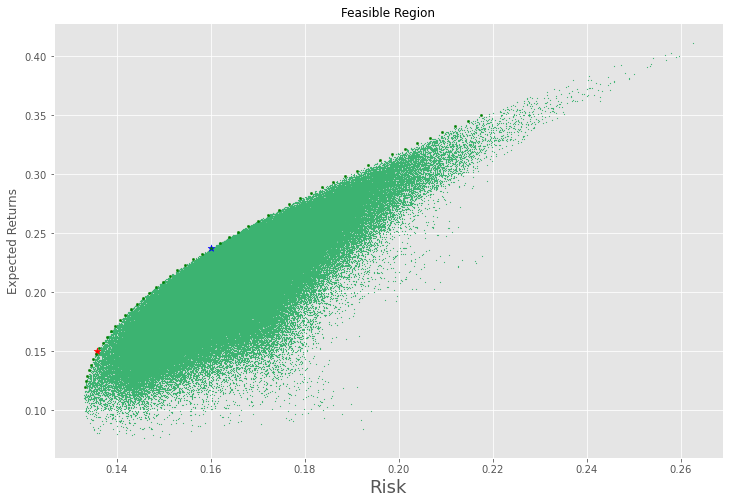

In [29]:
# Part 7
# Visualization:  Efficient frontier, optimization points, feasible region (300,000 data points)

pl.figure(figsize = (12,8))
pl.scatter(risk, expected_return, s =0.5, color = 'mediumseagreen')
pl.scatter(risk_opt1, return_opt1, marker ='*',s = 50, color = 'red')
pl.scatter(risk_opt2, return_opt2, marker ='*',s = 50, color = 'blue')
pl.scatter(risk_opt,returns,s = 5, color = 'green' )
pl.title("Feasible Region", fontsize = 12)
pl.xlabel('Risk', fontsize = 18)
pl.ylabel('Expected Returns', fontsize = 12)
pl.show()




In [10]:
# Part 8 
# Optimization with constrains: mathematical solution (Lagrange multipliers) 

def math_solution(min_return,sigma,mu):
    N = len(sigma)
    o = np.ones(N)
    sigma_inverse = np.linalg.inv(sigma)
    a = np.dot(mu.T,np.dot(sigma_inverse,mu))
    b = np.dot(mu.T,np.dot(sigma_inverse,o))
    c = np.dot(o.T,np.dot(sigma_inverse,o))
    return (1/(a*c - b**2))*np.dot(sigma_inverse,((c*min_return-b)*mu+(a-b*min_return)*o))

w_opt1mf = np.round(math_solution(min_return,sigma,mu),5)
w_optmf = np.round(opt.x,5)

risk_opt1mf = estimate_risk(w_opt1mf)
risk_opt1mf = np.round(risk_opt1mf ,5)
return_opt1mf = np.sum(mu*w_opt1mf)
return_opt1mf = np.round(return_opt1mf ,5)
print(w_opt1mf) 
print(risk_opt1mf) 
print(return_opt1mf)  



[0.06695 0.13441 0.59255 0.1223  0.08379]
0.13585
0.15


In [26]:
# Part 9
# Results Summary 

print(110*'-')
print(f"{'Optimization Results - Optimization Software Scipy'} ")
print(110*'-')
print(f"{'minimum risk'} {risk_opt1:^8.4f}{'for target return'}\
{return_opt1:^8.4f}{'with optimal weight'} {w_opt1}")     
print(f"{'maximum_return'} {return_opt2:^8.4f}{'for target risk'}\
{risk_opt2:^8.4f}{'with optimal weight'} {w_opt2}")   
print(110*'-')

print(110*'-')
print(f"{'Optimization Results - Monte Carlo Simulation'} ")
print(110*'-')
print(f"{'minimum risk'} {init_risk:^8.4f}{'for target return'}\
{return_opt1mc:^8.4f}{'with optimal weight'} {w_opt1mc}")     
print(f"{'maximum_return'} {init_return:^8.4f}{'for target risk'}\
{risk_opt2mc:^8.4f}{'with optimal weight'} {w_opt2mc}")   
print(110*'-')

print(110*'-')
print(f"{'Optimization Results - Single Mathematical Formula (Lagrangian Method)'} ")
print(110*'-')
print(f"{'minimum risk'} {risk_opt1mf:^8.4f}{'for target return'}\
{return_opt1mf:^8.4f}{'with optimal weight'} {w_opt1mf}")     

  
  

--------------------------------------------------------------------------------------------------------------
Optimization Results - Optimization Software Scipy 
--------------------------------------------------------------------------------------------------------------
minimum risk  0.1358 for target return 0.1500 with optimal weight [0.06537 0.13239 0.59243 0.12382 0.08599]
maximum_return  0.2374 for target risk 0.1600 with optimal weight [0.04293 0.21117 0.408   0.33789 0.     ]
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Optimization Results - Monte Carlo Simulation 
--------------------------------------------------------------------------------------------------------------
minimum risk  0.1361 for target return 0.1495 with optimal weight [0.09633 0.16979 0.57031 0.09375 0.06983]
maximum_return  0.2375

Symbols,jpm
Date,
2012-01-04,0.006335
2012-01-05,0.020887
2012-01-06,-0.008968
2012-01-09,-0.001697
2012-01-10,0.021246


Symbols,Date,jpm
0,2012-01-04,0.006335
1,2012-01-05,0.020887
2,2012-01-06,-0.008968
3,2012-01-09,-0.001697
4,2012-01-10,0.021246


Symbols,jpm
index,
2012-01-08,0.006084
2012-01-15,0.003283
2012-01-22,0.010223
2012-01-29,-0.000791
2012-02-05,0.005723


Text(0.5, 0.98, 'Additive Decompose')

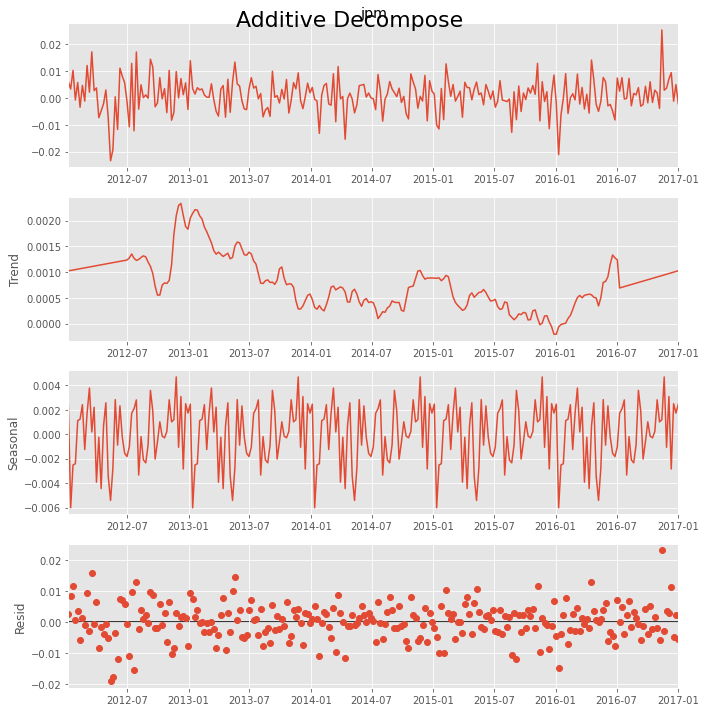

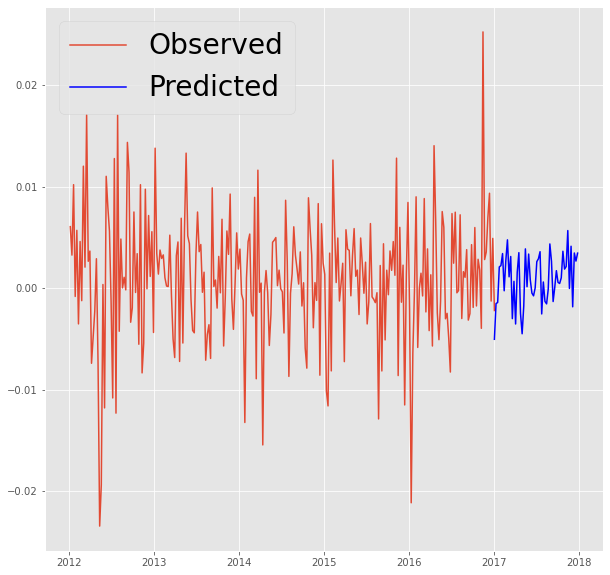

In [7]:
# Part 10
# Prediction using time series 


from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.metrics import mean_squared_error


df_jpm = stock_returns[['jpm']]
df_jpm.dropna(inplace=True)
df_jpm.head(5)

df_jpm.reset_index(inplace=True)
df_jpm.head()

df_jpm['index'] = df_jpm['Date'].astype('datetime64[ns]')

df_jpm2 = df_jpm.resample('W', label='right', closed = 'right', on='index').mean()#sum()
df_jpm2.head()

from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(df_jpm2['jpm'], model= 'additive', extrapolate_trend='freq')
# Plot
pl.rcParams.update({'figure.figsize': (10,10)}) 

result_add.plot().suptitle('Additive Decompose', fontsize=22) 
pl.show()
pl.savefig("decomp.png")

series0 = df_jpm2['jpm']

historic = series0
#prediction for the next 52 weeks (1 year)
n_pred = 52
date_pred = pd.date_range("2017-01-01", periods=n_pred, freq="w")

sel = ar_select_order(historic, 13, glob = True, seasonal = True, old_names=False)
sel.ar_lags
model_fit = sel.model.fit()
pred = model_fit.predict(start=len(historic), end=len(historic) + n_pred - 1, dynamic=False)

predictions = pd.Series(pred.values, index=date_pred)

pl.plot(series0, label='Observed')

pl.plot(predictions, color='blue', label='Predicted')
pl.legend(fontsize = 28)
pl.show()
